Descion Tree Classifier - > weather forecasting dataset using sklearn

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [3]:
#laod dataset
df = pd.read_csv('weather_forecast.csv')


In [4]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
print(df)

     Outlook Temperature Humidity   Windy Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes
None


In [7]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [8]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Windy          object
Play           object
dtype: object

In [9]:
df.shape

(14, 5)

In [11]:
#preprocessing : convert catergorical to numerical
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df.drop('Play',axis = 1)).toarray()
print(X_encoded)

[[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]]


In [12]:
y = df['Play']


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size = 0.2,random_state = 42)


In [14]:
clf_id3 = DecisionTreeClassifier(criterion='entropy',random_state = 42)
clf_id3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

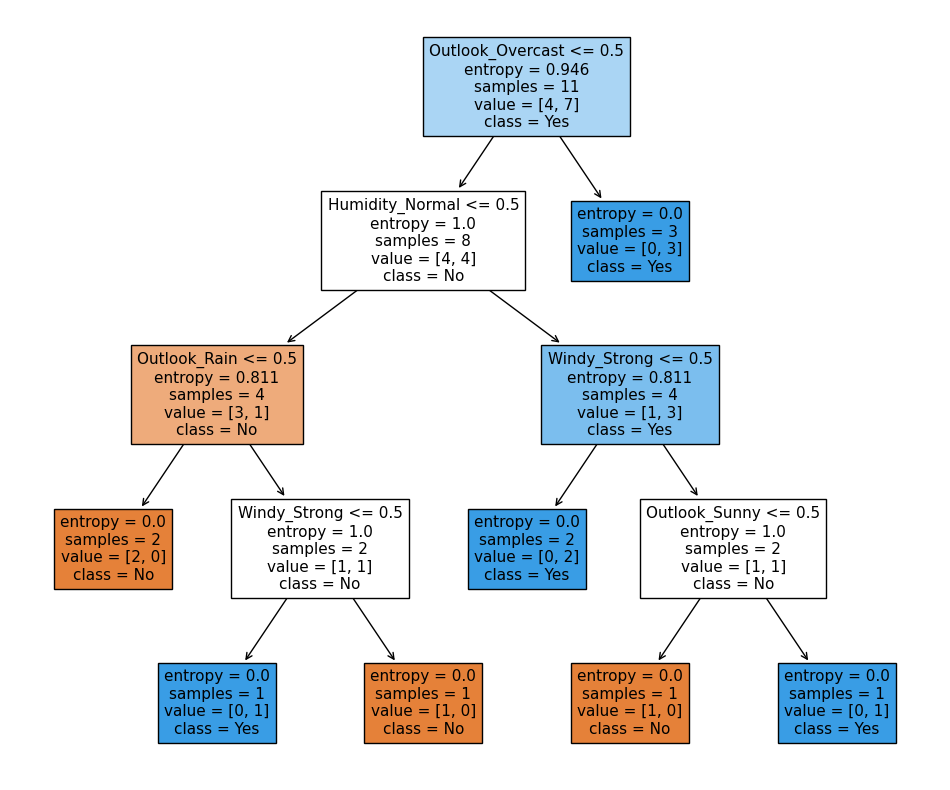

In [18]:
plt.figure(figsize = (12,10))
plot_tree(clf_id3, filled = True,feature_names=encoder.get_feature_names_out(['Outlook','Temperature','Humidity','Windy']),class_names=['No','Yes'])
plt.show()

In [19]:
y_pred_id3 = clf_id3.predict(X_test)


In [20]:
accuracy_id3 = accuracy_score(y_test,y_pred_id3)
print(accuracy_id3)
print(classification_report(y_test,y_pred_id3))
print(classification_report)

1.0
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

<function classification_report at 0x7a96c48c01f0>
